In [1]:
import os
import pathlib 

In [2]:
print("Exploratory Data Analysis-Lab Cycle")

Exploratory Data Analysis-Lab Cycle


In [3]:
import pandas as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit

In [4]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Tk().withdraw() #we don't want a full GUI .so keep the root window from appearing 
filename=askopenfilename() #show an "open" 
print(filename)

/home/shrivatsa/Program-Files/Jupyter-Files/data-files/Customer_Churn.csv


In [5]:
churn=ps.read_csv("~/Program-Files/Jupyter-Files/data-files/Customer_Churn.csv")

In [6]:
churn.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [7]:
churn.rename(columns={'Frequency of SMS':'SMS',},inplace=True)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   SMS                      3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [8]:
churn.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [9]:
#Display the type of  variables
cats=list(churn.select_dtypes(include=['object']).columns)
nums=list(churn.select_dtypes(exclude=['object']).columns)
print(f'categorical variables: {cats}')
print(f'categorical variables: {nums}')


categorical variables: []
categorical variables: ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn']


In [10]:
churn.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [11]:
#to convert to categorical values
churn['Age']=ps.Categorical(churn['Age'])
churn['Complains']=ps.Categorical(churn['Complains'])
churn['Churn']=ps.Categorical(churn['Churn'])

In [12]:
#visualization of data
#import the  package

import matplotlib.pyplot as pit
import seaborn as sn
%matplotlib inline

<Axes: xlabel='Age Group', ylabel='count'>

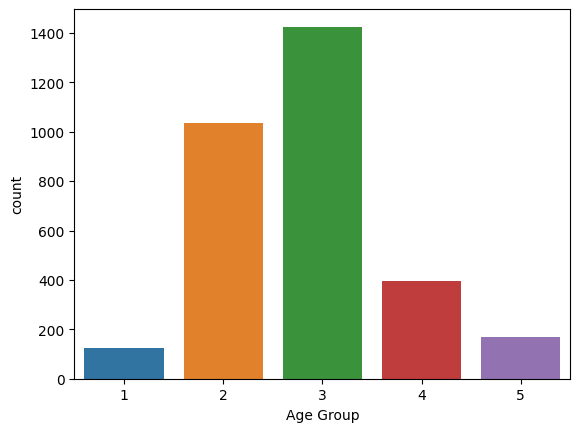

In [13]:
#to count for categorical variables
sn.countplot(x='Age Group',data=churn)

<Axes: >

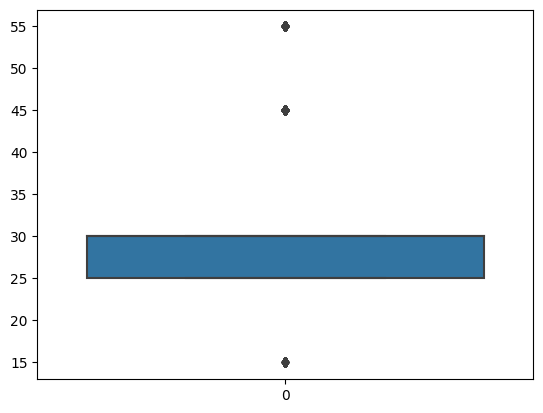

In [14]:
#Box plot for continous variables
#Should be drawn to identify the presence of outlier
sn.boxplot(churn['Age'])

(array([1101.,  704.,  429.,  406.,  181.,  152.,   83.,   47.,   37.,
          10.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <BarContainer object of 10 artists>)

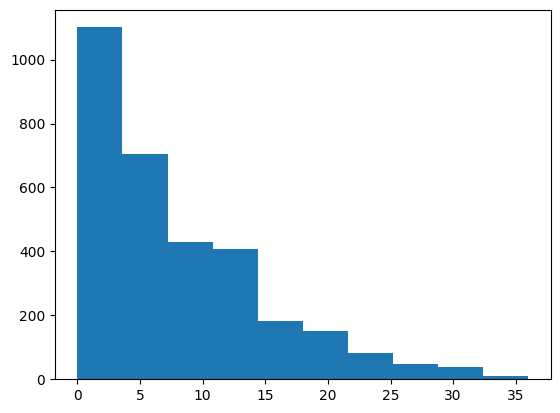

In [15]:
pit.hist(churn['Call  Failure'])

In [16]:
#dealing missing values
churn.isnull().sum()
#since there is no missing values,we ignore this other wise we can find the other missing values

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
SMS                        0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
#standerize the dataset for numerical attributes
nums=list (churn.select_dtypes(exclude=['object']).columns)
nums


In [ ]:
from sklearn import preprocessing